<a href="https://colab.research.google.com/github/YifanSong348/STATS302/blob/main/Week%203/College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STATS302 HW 3 - Yifan Song
###Problem 2. Programming

In [102]:
import pandas as pd
import numpy as np
from google.colab import files
import io

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# import dataset
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['College.csv']))
# df = data.drop(data.columns[0], axis=1)
print(df.shape)
df.head()

Saving College.csv to College (2).csv
(777, 19)


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [104]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [105]:
df['Private'] = df['Private'].map({'Yes':1,'No':0})
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [106]:
df.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# a. Split the data set into a training set and a test set.

> Set “test_size” to 0.3 when use “train_test_split”



In [107]:
# Split data into training and test sets
X = df[['Private', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']]
y = df['Apps']

# Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [108]:
print(X_train.shape)
print(X_test.shape)

(543, 17)
(234, 17)


# b. Fit a linear model using least squares on the training set, and report the test error obtained.

In [109]:
# X_train = X_train.drop(['const'], axis = 1)
# X_train.head()
# X_test.head()

> Linear model



In [110]:
regressor = LinearRegression()
model_linear = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

coefficient of determination: 0.9229935811700758
intercept: 3019.23853339895
slope: [-1.69385441e+02  3.84348346e+03 -7.41582477e+02  9.85229708e+02
 -3.57890861e+02  3.11117516e+02  5.66772900e+01 -3.68454016e+02
  1.86211873e+02 -2.03655228e+01  9.99052801e+00 -1.62584197e+02
 -2.95169754e+01  5.78657752e+01 -1.04041422e+00  4.16313277e+02
  1.60226916e+02]


> Test error


In [111]:
y_pred1 = model_linear.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 542.3292539889459
Mean Squared Error: 642753.8976533788
Root Mean Squared Error: 801.7193384554091


> OLS model


In [112]:
# X_train = sm.add_constant(X_train) ## add an intercept (beta_0) to the model

# Note the difference in argument order
model_LS = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
# predictions = model_LS.predict(X_train)

# Print out the statistics
model_LS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Apps   R-squared (uncentered):                   0.600
Model:                            OLS   Adj. R-squared (uncentered):              0.587
Method:                 Least Squares   F-statistic:                              46.40
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                    5.67e-93
Time:                        09:36:29   Log-Likelihood:                         -5155.1
No. Observations:                 543   AIC:                                  1.034e+04
Df Residuals:                     526   BIC:                                  1.042e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -125.4440    239.222     -0.524      0.600    -595.392     344.504
x2          3980.4772    350.614     11.353      0.000    3291.701    4669.254
x3         -1073.2046    660.603     -1.625      0.105   -2370.948     224.539
x4           952.3167    372.571      2.556      0.011     220.406    1684.227
x5          -249.5828    337.516     -0.739      0.460    -912.627     413.462
x6           597.8454    586.161      1.020      0.308    -553.658    1749.349
x7          -176.5233    244.018     -0.723      0.470    -655.893     302.847
x8          -495.8363    290.249     -1.708      0.088   -1066.025      74.352
x9           242.3515    203.388      1.192      0.234    -157.200     641.903
x10          -62.7434    148.481     -0.423      0.673    -354.431     228.944
x11           48.9218    160.352      0.305      0.760    -266.087     363.931
x12         -220.8306    278.931     -0.792      0.429    -768.787     327.125
x13          129.8278    283.260      0.458      0.647    -426.633     686.289
x14           46.9803    190.138      0.247      0.805    -326.543     420.504
x15           -7.6886    194.129     -0.040      0.968    -389.052     373.674
x16          450.7021    223.574      2.016      0.044      11.494     889.910
x17          108.8240    187.733      0.580      0.562    -259.975     477.623
==============================================================================
Omnibus:                      247.135   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3083.135
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                      14.195   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Test error


In [113]:
y_pred2 = model_LS.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 2995.695978727171
Mean Squared Error: 9743644.71650941
Root Mean Squared Error: 3121.4811734991144


# c. Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

> Ridge regression model



In [114]:
# # Generate an array of alpha values ranging from very big to very small, essentially covering 
# # the full range of scenarios from the null model containing only the intercept, to the least squares fit
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [115]:
# Find lambda by cross-validation
# By default, the function 'RidgeCV' performs generalized cross-validation (an efficient form of LOOCV)
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)

print('Intercept is ', ridgecv.intercept_)
print('Coef are ', ridgecv.coef_)
print('Lambda is ', ridgecv.alpha_)

Intercept is  3020.4812103786862
Coef are  [-167.18424101 3702.17264244 -535.51075848  922.85250254 -311.92240253
  244.9226679    54.44019682 -344.93954608  193.26110846  -17.20412296
    6.31751825 -154.86590357  -35.01548237   60.87567607  -11.85690813
  419.09433645  162.64913301]
Lambda is  0.005


In [116]:
# fit the model using the lambda
ridge = skl_lm.Ridge()
ridge = ridge.set_params(alpha = ridgecv.alpha_)
# ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
model_Ridge = ridge.fit(X_train, y_train)

> Test error


In [117]:
y_pred3 = model_Ridge.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
# mean_squared_error(y_test, ridge4.predict(X_test))

Mean Absolute Error: 542.3151094635801
Mean Squared Error: 642759.8672990085
Root Mean Squared Error: 801.7230614738537


# d.  Fit a lasso model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.





> Lasso model

In [121]:
# perform 10-fold cross-validation to choose the best lambda (alpha)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

print('Intercept is ', lassocv.intercept_)
print('Coef are ', lassocv.coef_)
print('Lambda is ', lassocv.alpha_)

Intercept is  3020.847528832639
Coef are  [-145.65152732 3660.17221339 -220.4859177   789.4285099  -200.88716393
    0.           38.78293961 -303.67491114  167.81143077   -0.
    0.         -129.19582697  -29.10741972   38.53976968   -7.68847175
  394.20573127  120.92694085]
Lambda is  0.5695728121672013


In [122]:
# fit the model using the lambda
lasso = lasso.set_params(alpha = lassocv.alpha_)
# lasso = Lasso(alpha = lassocv.alpha_, normalize = True)
model_Lasso = lasso.fit(X_train, y_train)

> Test error


In [123]:
y_pred4 = model_Lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
# mean_squared_error(y_test, lasso.predict(X_test))

Mean Absolute Error: 526.7460897825249
Mean Squared Error: 662057.414566982
Root Mean Squared Error: 813.6691063122539


> The coefficients



,feature,coefficient
0,Intercept,3020.847529
1,Private,-145.651527
2,Accept,3660.172213
3,Enroll,-220.485918
4,Top10perc,789.428510
5,Top25perc,-200.887164
6,F.Undergrad,0.000000
7,P.Undergrad,38.782940
8,Outstate,-303.674911
9,Room.Board,167.811431


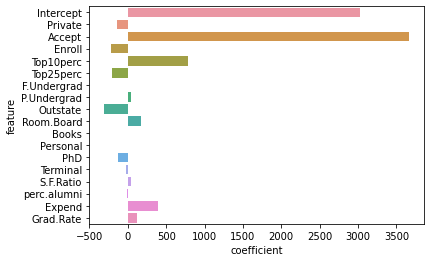

In [124]:
intercept = pd.DataFrame({'feature': 'Intercept', 'coefficient': [model_Lasso.intercept_]})
lasso_df  = intercept.append(pd.DataFrame({'feature': X.columns, 'coefficient': model_Lasso.coef_}), ignore_index = True)
ax = sns.barplot(x = 'coefficient', y = 'feature', data = lasso_df)
display(lasso_df)

We can see that 15 of the 18 coefficients are non-zero.

To sum up, the MSE of each model is: 

Linear model: 642753.8976533788

OLS model: 9743644.71650941

Ridge model: 642759.8672990085

Lasso model: 662057.414566982